# Final Project Dicoding
## RockPapperScissors

The aim of this program is to recognize 3 images in the form of Rock Paper Scissors

Dataset : https://drive.google.com/drive/folders/1tNjViyn72wVD7aFR1rMycHgiAuewu29w?usp=sharing

### I. Import Library is Required

In [ ]:
import tensorflow as tf
import zipfile
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [88]:
# Tensorflow version
print(tf.__version__)

2.3.0


### II. Extract Zip Dataset Folder
Data is stored on google drive

In [57]:
local_zip = 'drive/My Drive/Datasets/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

In [58]:
train_data = 'dataset/rockpaperscissors/train'
valid_data = 'dataset/rockpaperscissors/validation'

### III. Image Processing I
Source :  https://keras.io/api/preprocessing/image/

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip= True)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True)


In [60]:
train_batch = train_datagen.flow_from_directory(train_data, 
                                                target_size=(224,224), 
                                                color_mode='rgb',
                                                classes=['paper','rock','scissors'], 
                                                batch_size = 32,
                                                seed=101)
valid_batch = valid_datagen.flow_from_directory(valid_data,
                                                target_size=(224,224), 
                                                color_mode='rgb', 
                                                classes=['paper','rock','scissors'],
                                                batch_size = 32,
                                                seed=101)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [61]:
# label the dataset
# optional, just to see how the labeling process goes
def plots_img(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


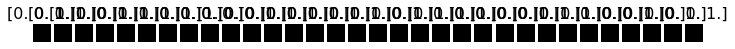

In [62]:
imgs, labels = next(train_batch)
plots_img(imgs, titles=labels)

### IV. Modelling

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [64]:
# Summary Model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 128)      

In [66]:
# Loss, Optimizer and Metrics
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [67]:
# Fit Model
result = model.fit(train_batch, 
          steps_per_epoch=30, 
          epochs=10, 
          validation_data=valid_batch,
          validation_steps=5,
          verbose=1)

Epoch 1/10
30/30 [==============================] - 94s 3s/step - loss: 1.0748 - accuracy: 0.4108 - val_loss: 1.0094 - val_accuracy: 0.4313
Epoch 2/10
30/30 [==============================] - 96s 3s/step - loss: 0.8020 - accuracy: 0.6500 - val_loss: 0.5922 - val_accuracy: 0.7625
Epoch 3/10
30/30 [==============================] - 93s 3s/step - loss: 0.4002 - accuracy: 0.8591 - val_loss: 0.3497 - val_accuracy: 0.8687
Epoch 4/10
30/30 [==============================] - 96s 3s/step - loss: 0.2901 - accuracy: 0.9042 - val_loss: 0.3139 - val_accuracy: 0.8750
Epoch 5/10
30/30 [==============================] - 93s 3s/step - loss: 0.2426 - accuracy: 0.9312 - val_loss: 0.3008 - val_accuracy: 0.8875
Epoch 6/10
30/30 [==============================] - 97s 3s/step - loss: 0.1542 - accuracy: 0.9495 - val_loss: 0.1981 - val_accuracy: 0.8938
Epoch 7/10
30/30 [==============================] - 97s 3s/step - loss: 0.1454 - accuracy: 0.9538 - val_loss: 0.0598 - val_accuracy: 0.9750
Epoch 8/10
30/30 [==

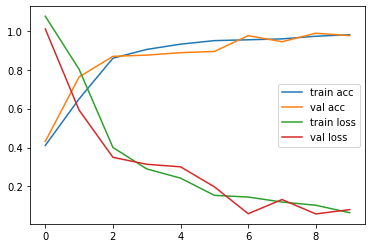

<Figure size 432x288 with 0 Axes>

In [71]:
# Display training results in graphical form
print(plt.plot(result.history['accuracy'], label='train acc'))
plt.plot(result.history['val_accuracy'], label='val acc')
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### V. Predict New Images

Saving 0P6uxM8Vr1DwySHe.png to 0P6uxM8Vr1DwySHe (4).png
0P6uxM8Vr1DwySHe.png
Prediction Results : Rock


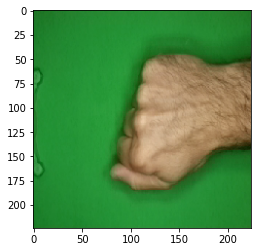

In [87]:
# try to do a rock image prediction
pic = files.upload()
 
for picture in pic.keys():

  pth = picture
  img = image.load_img(pth, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  decision = model.predict(images, batch_size=10)
  
  print(fn)
  if decision[0,0] != 0:
    print('Prediction Results : Paper')
  elif decision[0,1] != 0 :
    print('Prediction Results : Rock')
  else:
    print('Prediction Results : Scissors')